In [102]:
import pandas as pd
import numpy as npmetrics.explained_variance_score(y_test,predictions)

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
%matplotlib inline

In [105]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [106]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [107]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [108]:
df = pd.DataFrame(boston.data,columns=boston['feature_names'])

Checking if any column has a null value and if they have how many are there:

In [109]:
null_values = pd.DataFrame([pd.isnull(df).any()],boston['feature_names'],columns=['Any'])
null_values['Sum'] = pd.isnull(df).sum()

In [110]:
null_values

,Any,Sum
CRIM,NaN,0
ZN,NaN,0
INDUS,NaN,0
CHAS,NaN,0
NOX,NaN,0
RM,NaN,0
AGE,NaN,0
DIS,NaN,0
RAD,NaN,0
TAX,NaN,0


In [111]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Using info method to know the total number of columns and the total number of rows (entries) plus the type of objets are in the df

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


Adding the price column:

In [113]:
df['PRICE'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In order to get a quick account of the statistical info of the data, use describe method:

In [114]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


To list the column names:

In [115]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

Plots to check the data:
(Histograms and correlation scatter plots).

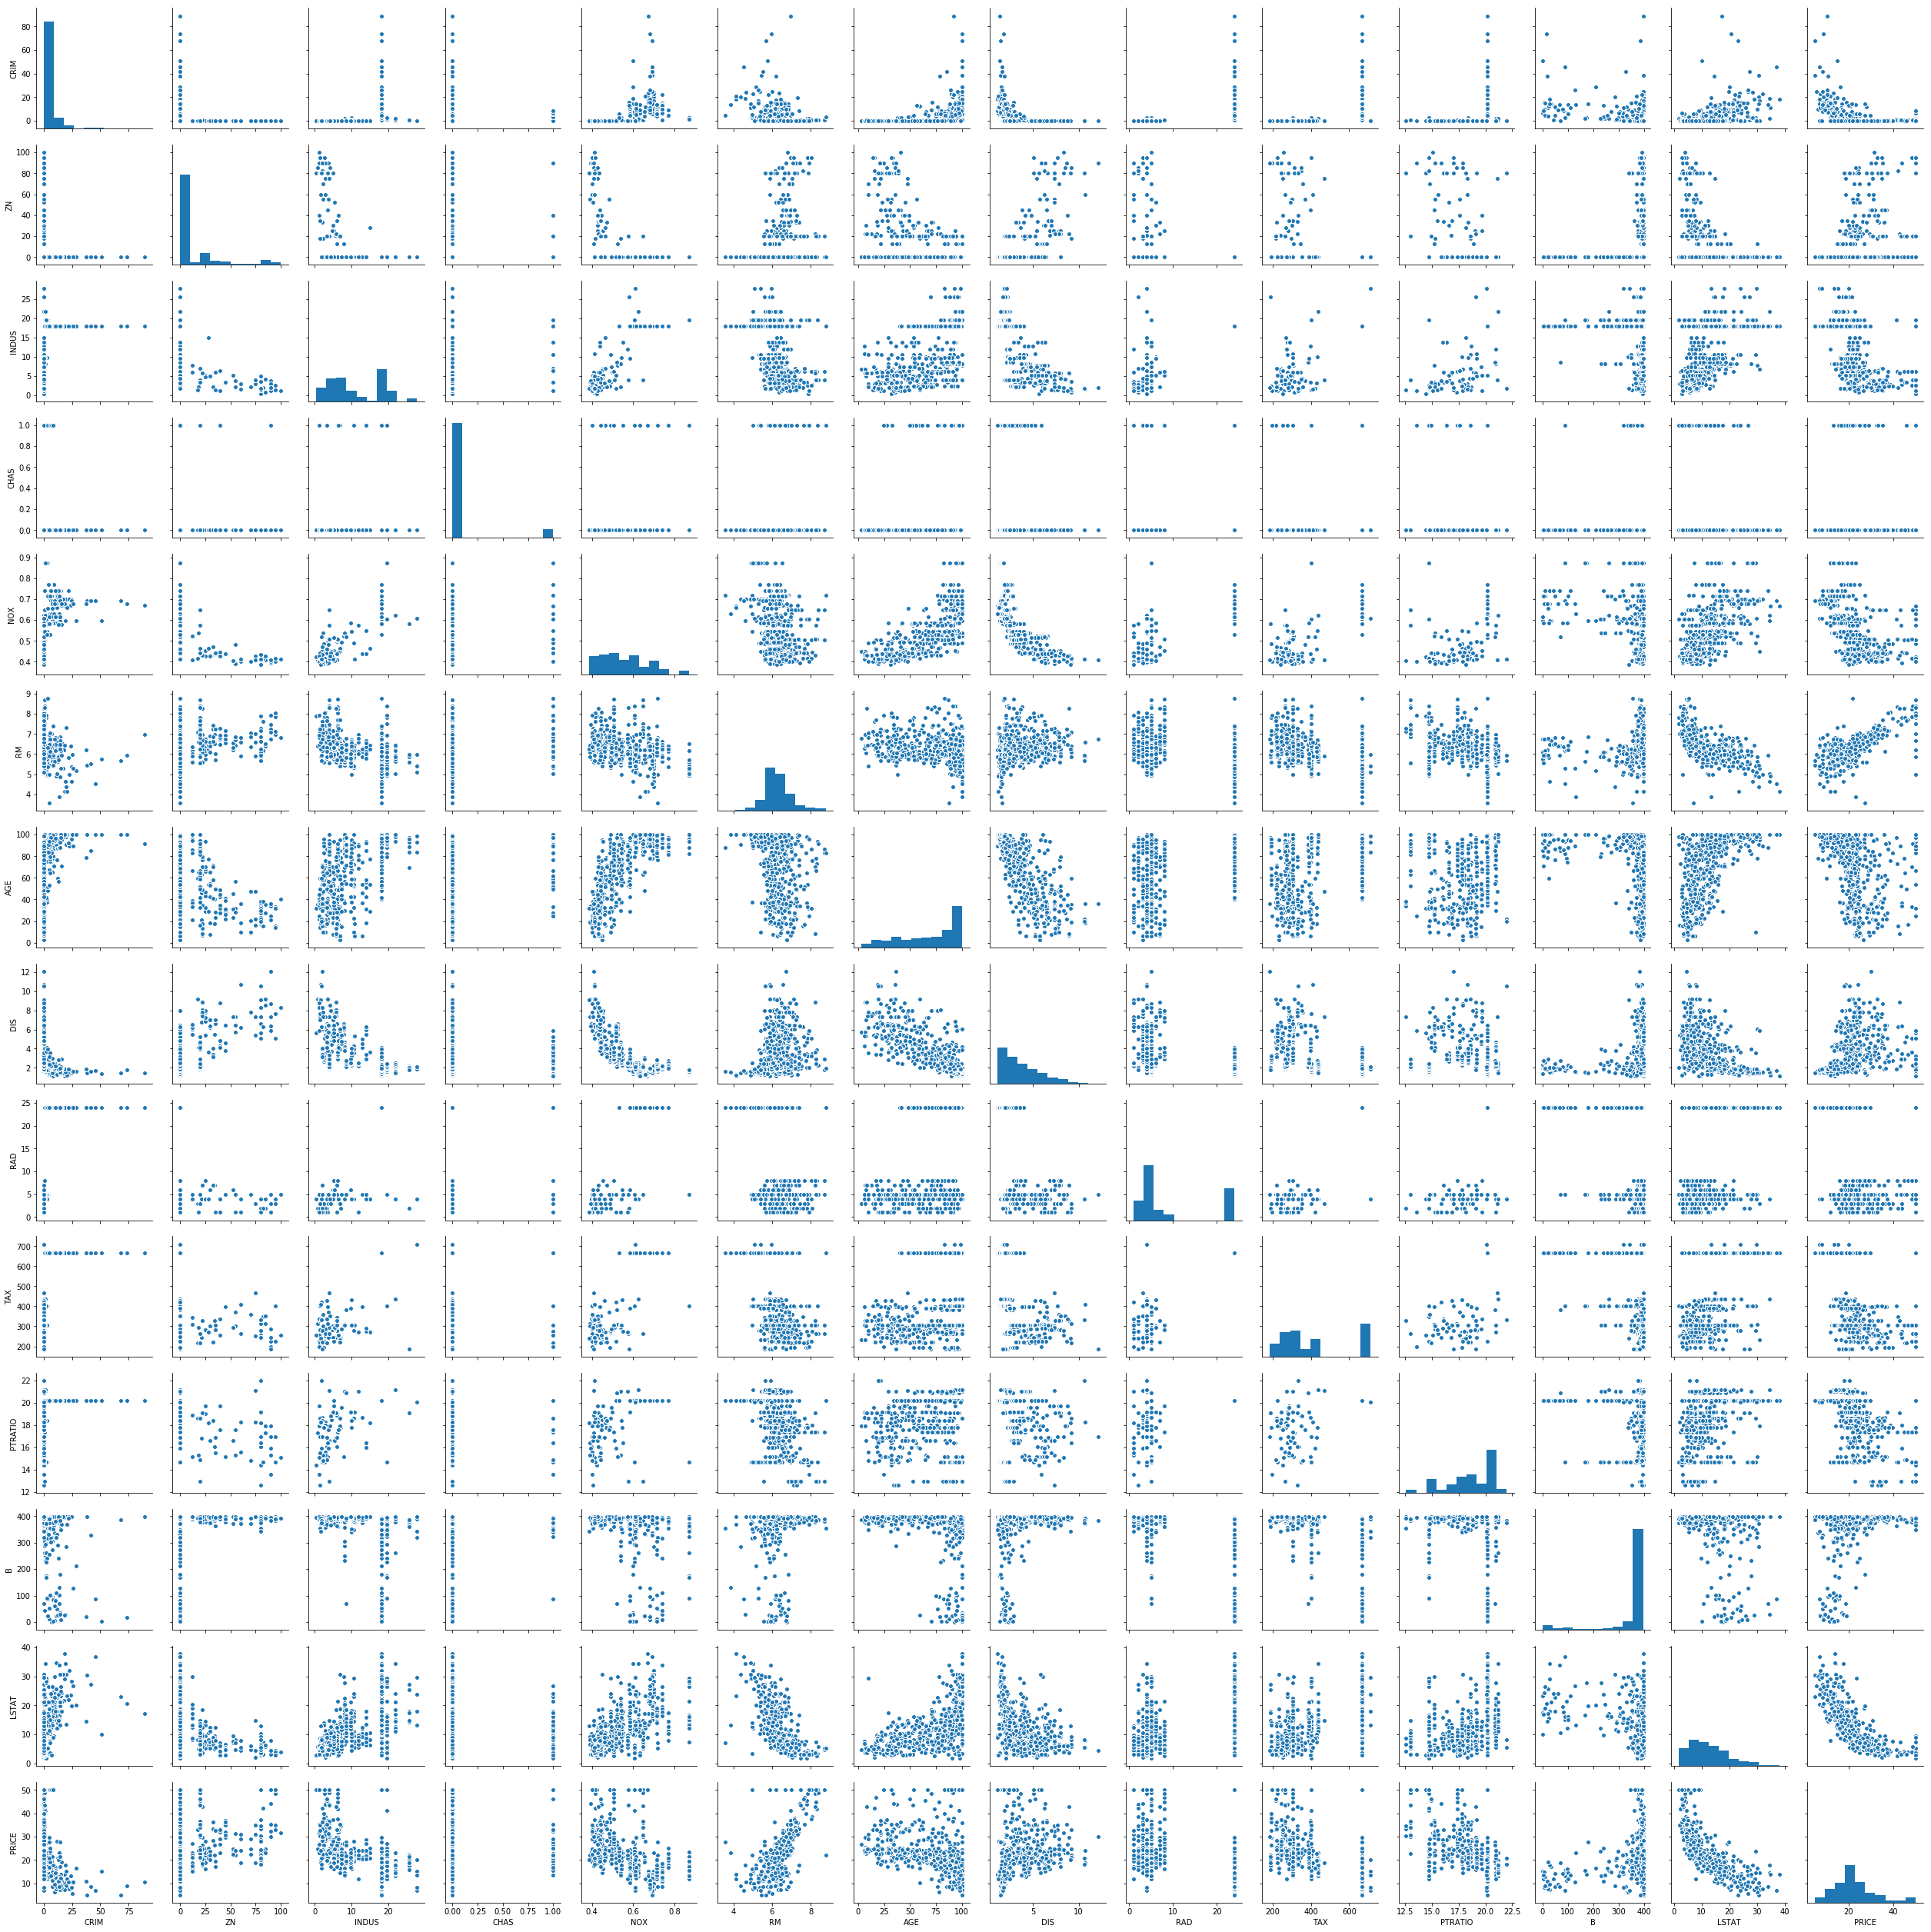

In [116]:
sns.pairplot(df)

Checking the distribution of the prices:

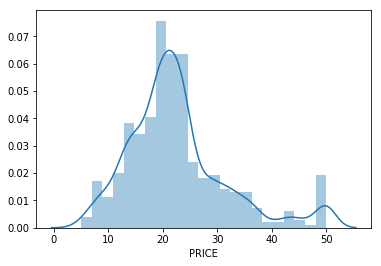

In [117]:
sns.distplot(df['PRICE'])

Getting the correlation of the columns:

In [118]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


And plotting the correlations as a heatmap:

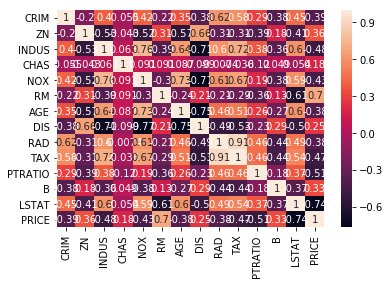

In [119]:
sns.heatmap(df.corr(),annot=True)

Now, in order to do the linear regression, the data is going to be separated into X for the features and Y for the price, leaving behind the 'Address' column because it contains strings of info.

In [120]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [121]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [122]:
y = df['PRICE']

Splitting the data into training set and test set:

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

To create and train the model:

In [125]:
from sklearn.linear_model import LinearRegression

Making an instance of the linear regression model:

In [126]:
lm = LinearRegression()

Using fit in order to train or fit the model on the training data:

In [127]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Evaluating model by checking coefficients:
(First getting the intercept)

In [128]:
print(lm.intercept_)

40.2660512371


The coefficients relate to each feature in the data set:

In [129]:
lm.coef_

array([ -8.74917163e-02,   5.02793747e-02,   2.06785359e-02,
         3.75457604e+00,  -1.77933846e+01,   3.24118660e+00,
         1.20902568e-02,  -1.40965453e+00,   2.63476633e-01,
        -1.03376395e-02,  -9.52633123e-01,   6.20783942e-03,
        -5.97955998e-01])

Based on this coefficients, a df is created in order to organize this a little better:
(Remembering that each coefficient relates to a column in X)

In [130]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [131]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [132]:
cdf

,Coeff
CRIM,-0.087492
ZN,0.050279
INDUS,0.020679
CHAS,3.754576
NOX,-17.793385
RM,3.241187
AGE,0.012090
DIS,-1.409655
RAD,0.263477
TAX,-0.010338


# Predictions

In [133]:
predictions = lm.predict(X_test)

In [134]:
predictions

array([ 40.10811554,  27.38818438,  16.62275339,  16.96724769,
        31.13052436,  32.16855055,  38.54423044,   8.1415741 ,
        33.49279591,   7.23827031,  30.45969016,  13.43835592,
        16.24482072,  17.34472521,  25.15783151,  20.44651953,
         7.2915916 ,  33.14026192,  28.41397565,  24.58734907,
        12.44147415,  20.2529534 ,  22.49105585,  24.41663395,
        33.92669891,  18.61711824,  32.32556495,  18.67263407,
        27.36364064,  34.46323015,  19.84085886,  18.405794  ,
        37.15825268,  44.94487168,  30.26702827,  22.00944233,
        15.96931294,  18.16349864,   4.29021638,  30.94533964,
        24.15363628,  17.17015458,  34.10041499,  13.8933431 ,
        17.45708089,  25.31138188,  30.35419964,  16.10203543,
        26.91886024,  22.97874816,  32.14679914,  37.32340404,
        22.89992057,  17.58660577,  30.18674667,   0.10907562,
        20.22197066,  16.8215286 ,  23.15583025,  21.15717024,
        30.57067488,   3.14938583,  15.93648224,  20.05

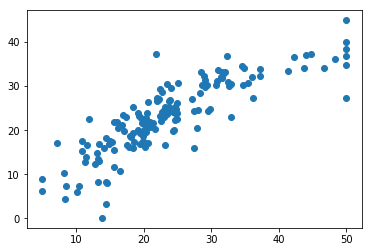

In [135]:
plt.scatter(y_test,predictions)

Creating an histogram of the residuals:

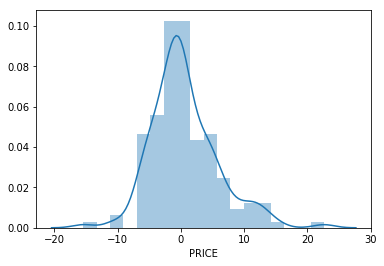

In [136]:
sns.distplot((y_test-predictions))

Linear regression evaluation:

In [142]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R^2:',metrics.explained_variance_score(y_test,predictions))

MAE: 3.83652813773
MSE: 28.5511487657
RMSE: 5.34332749938
R^2: 0.715897108088
